
## Diffusion-StyleGAN2





source: https://github.com/Zhendong-Wang/Diffusion-GAN

source paper:https://arxiv.org/abs/2206.02262



In [1]:

!git clone https://github.com/Zhendong-Wang/Diffusion-GAN


Cloning into 'Diffusion-GAN'...
remote: Enumerating objects: 185, done.
remote: Counting objects: 100% (185/185), done.
remote: Compressing objects: 100% (116/116), done.
remote: Total 185 (delta 84), reused 161 (delta 65), pack-reused 0
Receiving objects: 100% (185/185), 2.28 MiB | 21.21 MiB/s, done.
Resolving deltas: 100% (84/84), done.


Uninstall pre-installed torchtext from collab to avoid version conflict.

In [2]:
!pip uninstall torchtext 

Found existing installation: torchtext 0.12.0
Uninstalling torchtext-0.12.0:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/torchtext-0.12.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/torchtext/*
Proceed (y/n)? y
  Successfully uninstalled torchtext-0.12.0


Install packages

In [3]:
!pip install click requests tqdm pyspng ninja imageio-ffmpeg==0.4.3. timm torch==1.7.1 torchvision==0.8.2 torchaudio==0.7.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 195 kB 8.4 MB/s 
     |████████████████████████████████| 108 kB 22.2 MB/s 
     |████████████████████████████████| 26.9 MB 59.9 MB/s 
     |████████████████████████████████| 431 kB 42.4 MB/s 
     |████████████████████████████████| 776.8 MB 17 kB/s 
     |████████████████████████████████| 12.8 MB 17.3 MB/s 
     |████████████████████████████████| 7.6 MB 15.4 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.11.0+cu113
    Uninstalling torch-1.11.0+cu113:
      Successfully uninstalled torch-1.11.0+cu113
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.12.0+cu113
    Uninstalling torchvision-0.12.0+cu113:
      Successfully uninstalled torchvision-0.12.0+cu113
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 0.11.0+cu113
    Uninstalling torchaudio-0.11.0+cu113

Change folder

In [4]:
cd Diffusion-GAN/diffusion-stylegan2


/content/Diffusion-GAN/diffusion-stylegan2


Create folder where the test set will be stored in.

In [5]:
!mkdir datasets

In [6]:
from torchvision.datasets import CIFAR10
CIFAR10(root='/content/Diffusion-GAN/diffusion-stylegan2/datasets', train=False, download=True)

0it [00:00, ?it/s]

Extracting /content/Diffusion-GAN/diffusion-stylegan2/datasets/cifar-10-python.tar.gz to /content/Diffusion-GAN/diffusion-stylegan2/datasets


Dataset CIFAR10
    Number of datapoints: 10000
    Root location: /content/Diffusion-GAN/diffusion-stylegan2/datasets
    Split: Test

Use data_tool.py to transform test data into desired format. Specify correct format (resolution).

In [7]:
!python dataset_tool.py --source=/content/Diffusion-GAN/diffusion-stylegan2/datasets/cifar-10-python.tar.gz --dest=/content/Diffusion-GAN/diffusion-stylegan2/datasets/cifar10.zip \
    --transform=center-crop --width=32 --height=32
    ##--resolution=32x32



100% 50000/50000 [00:21<00:00, 2278.03it/s]


In [8]:
!python calc_metrics.py --metrics=fid50k_full --data=/content/Diffusion-GAN/diffusion-stylegan2/datasets/cifar10.zip --mirror=1 \
    --network=https://tsciencescu.blob.core.windows.net/projectshzheng/DiffusionGAN/diffusion-stylegan2-cifar10.pkl

Loading network from "https://tsciencescu.blob.core.windows.net/projectshzheng/DiffusionGAN/diffusion-stylegan2-cifar10.pkl"...
Dataset options:
{
  "class_name": "training.dataset.ImageFolderDataset",
  "path": "/content/Diffusion-GAN/diffusion-stylegan2/datasets/cifar10.zip",
  "resolution": 32,
  "use_labels": false,
  "xflip": true
}
Launching processes...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.

Generator            Parameters  Buffers  Output shape      Datatype
---                  ---         ---      ---               ---     
mapping.fc0          262656      -        [1, 512]          float32 
mapping.fc1          262656      -        [1, 512]          float32 
mapping              -           512      [1, 8, 512]       float32 
synthesis.b4.conv1   2622465     32       [1, 512, 4, 4]    float32 
synthesis.b4.torgb   264195      -        [1, 3, 4, 4]      float32 
synthesis.b4:0       8192        16       [1, 

## Generate faces using model pre-trained on FFHQ1024 dataset.

In [ ]:

!python generate.py --outdir=out --seeds=10-15 \
    --network=https://tsciencescu.blob.core.windows.net/projectshzheng/DiffusionGAN/diffusion-stylegan2-ffhq.pkl


Loading networks from "https://tsciencescu.blob.core.windows.net/projectshzheng/DiffusionGAN/diffusion-stylegan2-ffhq.pkl"...
Generating image for seed 10 (0/6) ...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
Generating image for seed 11 (1/6) ...
Generating image for seed 12 (2/6) ...
Generating image for seed 13 (3/6) ...
Generating image for seed 14 (4/6) ...
Generating image for seed 15 (5/6) ...


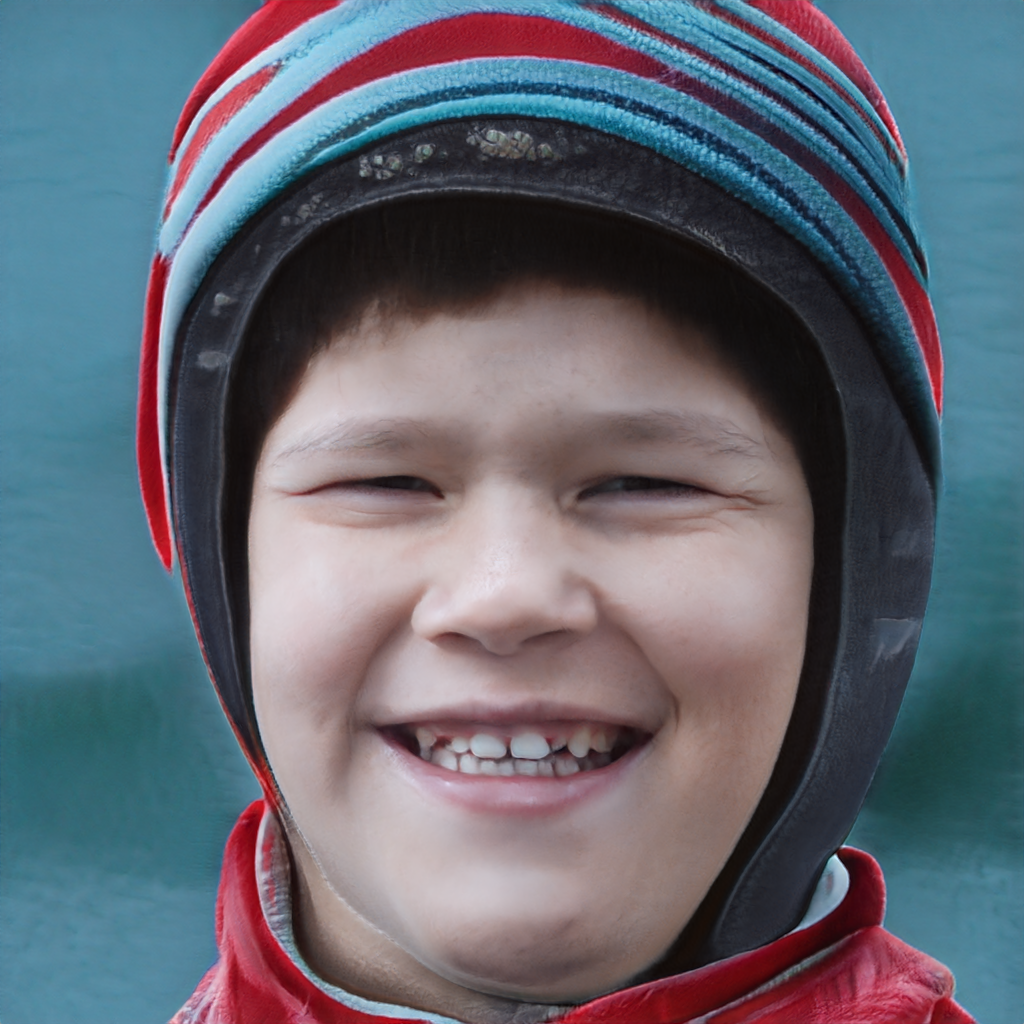

In [ ]:
from IPython.display import Image
Image(filename='/content/Diffusion-GAN/diffusion-stylegan2/out/seed0010.png') 

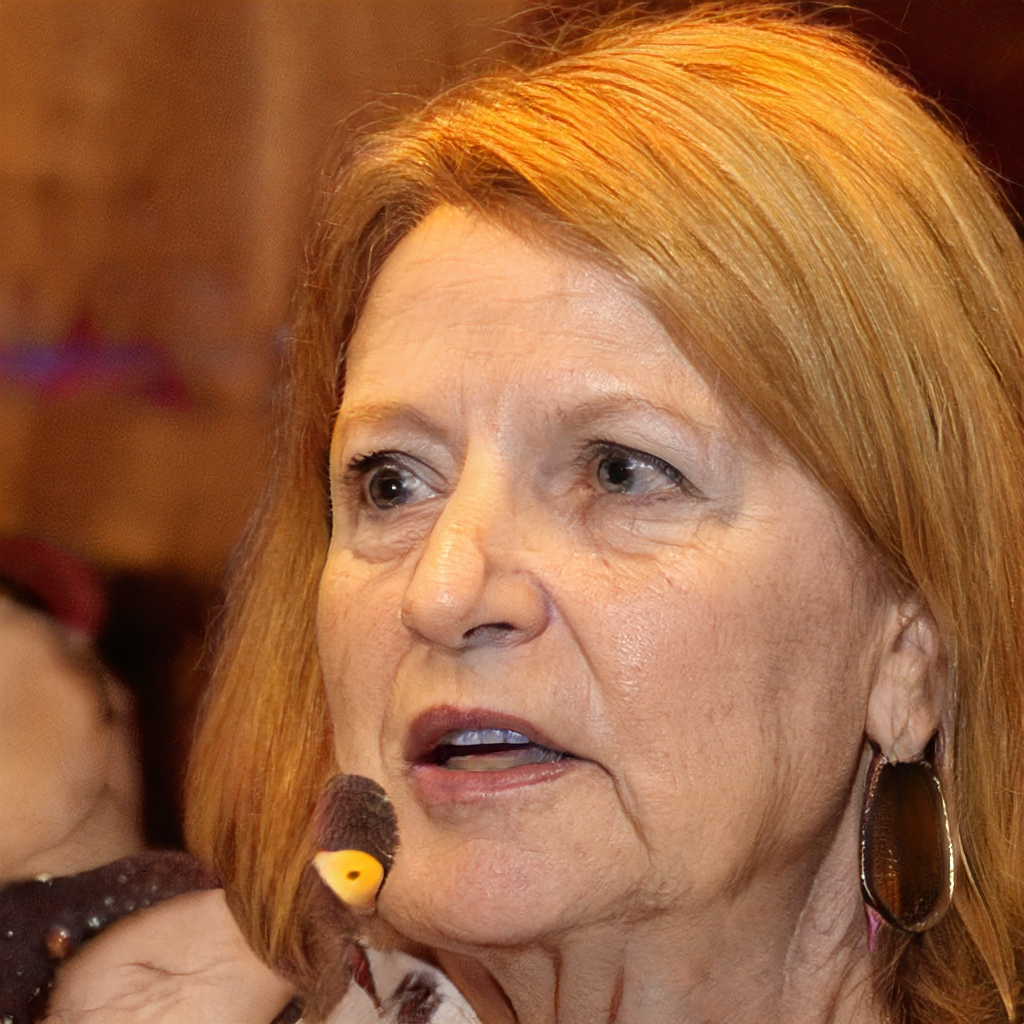

In [ ]:
from IPython.display import Image
Image(filename='/content/Diffusion-GAN/diffusion-stylegan2/out/seed0011.png') 